In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reload
df = pd.read_excel("wolves_standard_stats_scouted.xlsx")
df.head()
# print(df.columns.tolist())

,Player,Status,S,Age,MP,Starts,Min,90s,Gls,Ast,...,npxG+xAG90,SCA90,PrgA90,STO90,TAP90,Tackles90,Int90,Blocks90,Clear90,AW90
0,Rayan Aït-Nouri,left,DF,23.0,37.0,37.0,3109.0,34.5,4.0,7.0,...,0.237681,2.63,10.811594,1.82,2.78,2.58,0.75,1.22,2.17,0.64
1,João Gomes,NaN,MF,23.0,36.0,35.0,2974.0,33.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nélson Semedo,left,DF,30.0,34.0,32.0,2886.0,32.1,0.0,4.0,...,0.115265,1.87,8.286604,1.00,0.84,1.93,0.72,1.00,3.24,0.87
3,André,NaN,MF,23.0,33.0,31.0,2472.0,27.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Toti Gomes,NaN,DF,25.0,31.0,30.0,2614.0,29.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


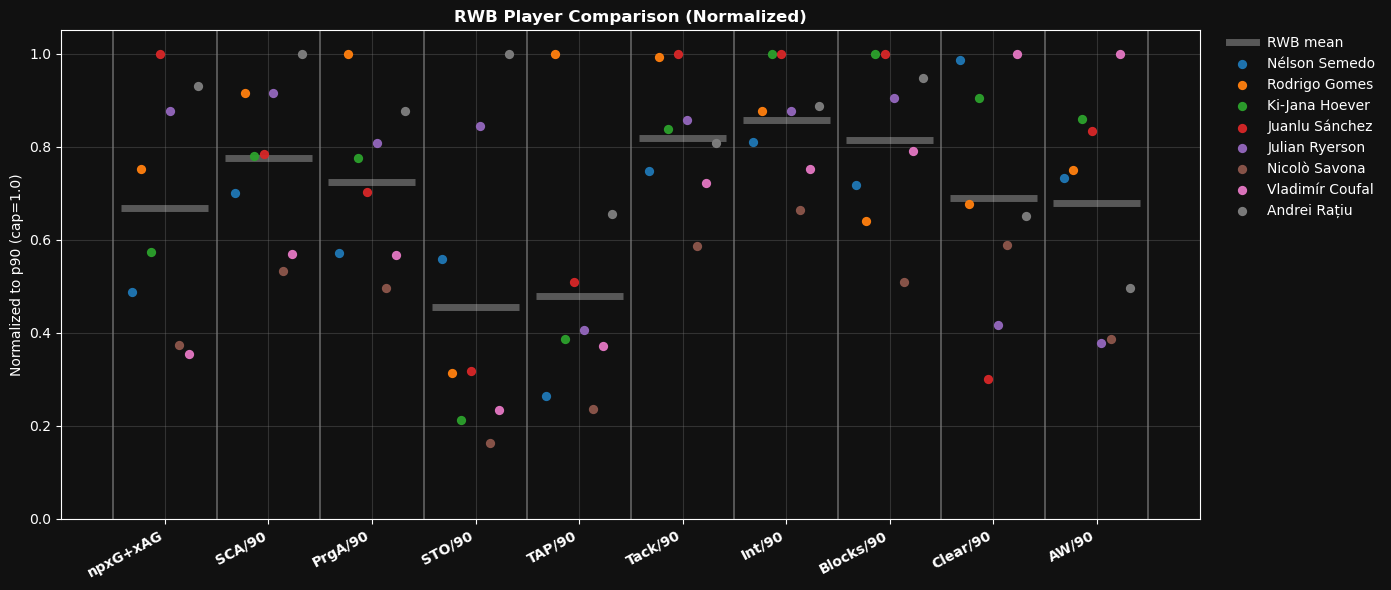

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects
from pathlib import Path

FILE = "wolves_standard_stats_scouted.xlsx"
df = pd.read_excel(FILE)

metrics = [
    'npxG+xAG90','SCA90','PrgA90','STO90','TAP90',
    'Tackles90','Int90','Blocks90','Clear90','AW90'
]
display_names = {
    'npxG+xAG90': 'npxG+xAG',
    'SCA90':      'SCA/90',
    'PrgA90':     'PrgA/90',
    'STO90':      'STO/90',
    'TAP90':      'TAP/90',
    'Tackles90':  'Tack/90',
    'Int90':      'Int/90',
    'Blocks90':   'Blocks/90',
    'Clear90':    'Clear/90',
    'AW90':       'AW/90'
}

attacking = ['npxG+xAG90','SCA90','PrgA90','STO90','TAP90']
defending = ['Tackles90','Int90','Blocks90','Clear90','AW90']

ATTACK_COLOR = "#1f77b4"
DEFEND_COLOR = "#d62728"
SEPARATOR_COLOR = "white"
SEP_THIN = 2.0
SEP_THICK = 3.5

rwb_df = df[df["Position"] == "RWB"].copy()
players = rwb_df["Player"].tolist()
p90 = df[metrics].quantile(0.90)
norm_df = rwb_df.copy()
for m in metrics:
    norm_df[m] = (rwb_df[m] / p90[m]).clip(upper=1.0)

means = norm_df[metrics].mean(axis=0)
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor("#111111")
ax.set_facecolor("#111111")

for b in np.arange(-0.5, len(metrics) - 0.5 + 0.01, 1.0):
    ax.vlines(b, 0, 1.05, linewidth=1.2, alpha=0.35, color=SEPARATOR_COLOR, zorder=0)

halfwidth = 0.42
for xi, y in zip(x, means.values):
    ax.hlines(y=y, xmin=xi - halfwidth, xmax=xi + halfwidth,
              linewidth=5, alpha=0.3, color=SEPARATOR_COLOR, zorder=2)

n_players = len(players)
jitter_span = 0.32
offsets = np.linspace(-jitter_span, jitter_span, n_players) if n_players > 1 else np.array([0.0])
for i, name in enumerate(players):
    yvals = norm_df.loc[norm_df['Player'] == name, metrics].values.flatten()
    ax.scatter(x + offsets[i], yvals, s=32, label=name, alpha=0.95, zorder=3)

ax.set_xticks(x)
tick_labels = [display_names[m] for m in metrics]
ax.set_xticklabels(tick_labels, rotation=28, ha='right', color="white")
for i, m in enumerate(metrics):
    color = ATTACK_COLOR if m in attacking else DEFEND_COLOR
    ax.get_xticklabels()[i].set_color(color)
    ax.get_xticklabels()[i].set_fontweight('bold')

ax.set_ylim(0, 1.05)
ax.set_ylabel("Normalized to p90 (cap=1.0)", color="white")
ax.set_title("RWB Player Comparison (Normalized)", color="white", fontweight="bold")

ax.tick_params(colors="white")
for spine in ax.spines.values():
    spine.set_color("white")
ax.grid(color="gray", alpha=0.3)

mean_handle = Line2D([0], [0], linewidth=5, alpha=0.3, color=SEPARATOR_COLOR, label='RWB mean')
handles, labels = ax.get_legend_handles_labels()
ax.legend([mean_handle] + handles, ['RWB mean'] + labels,
          bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.0,
          facecolor="#111111", edgecolor="none", labelcolor="white")

plt.tight_layout()
plt.show()

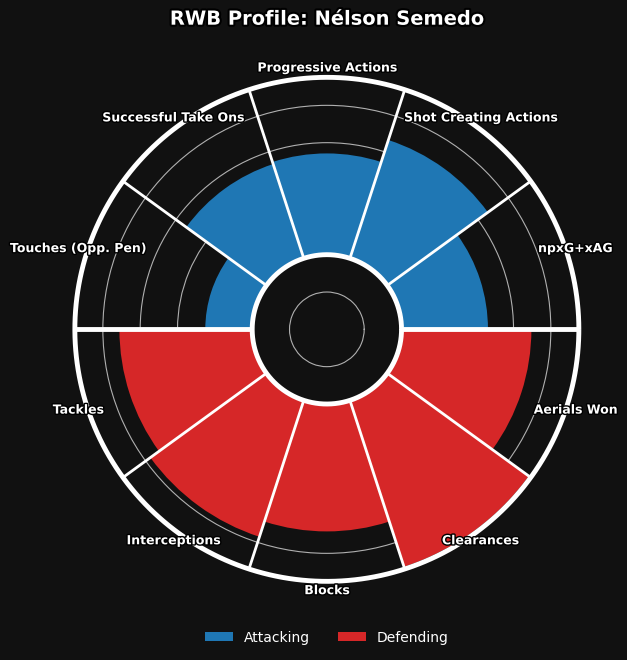

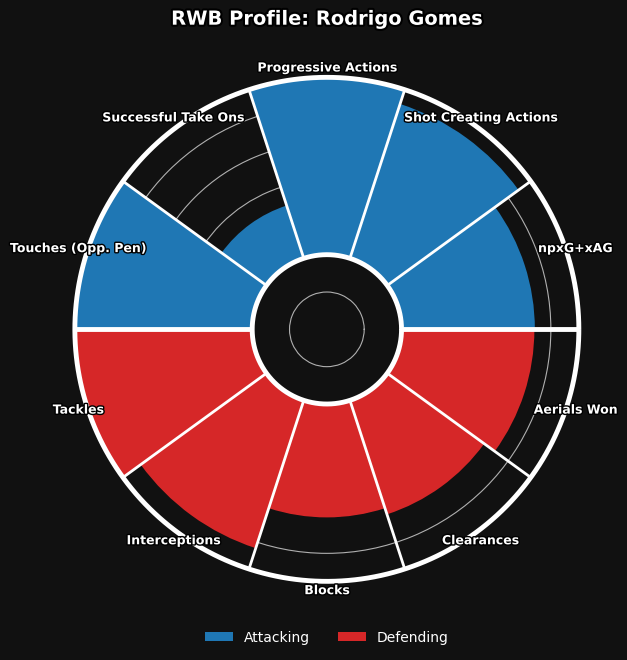

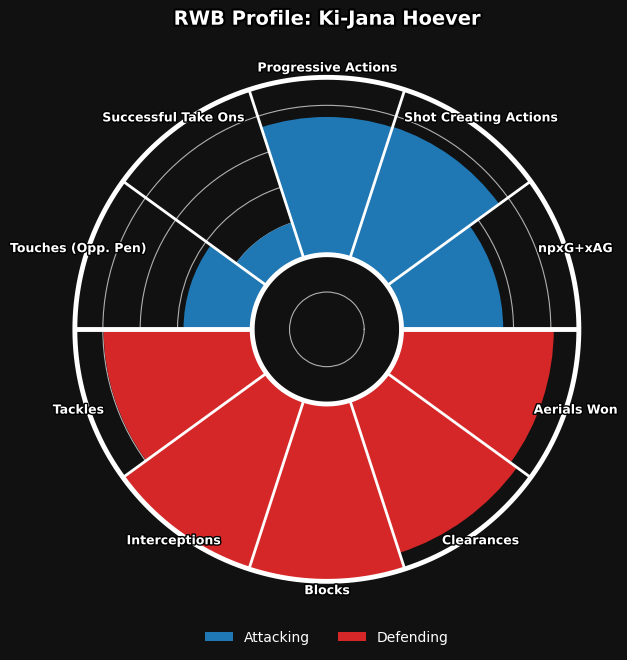

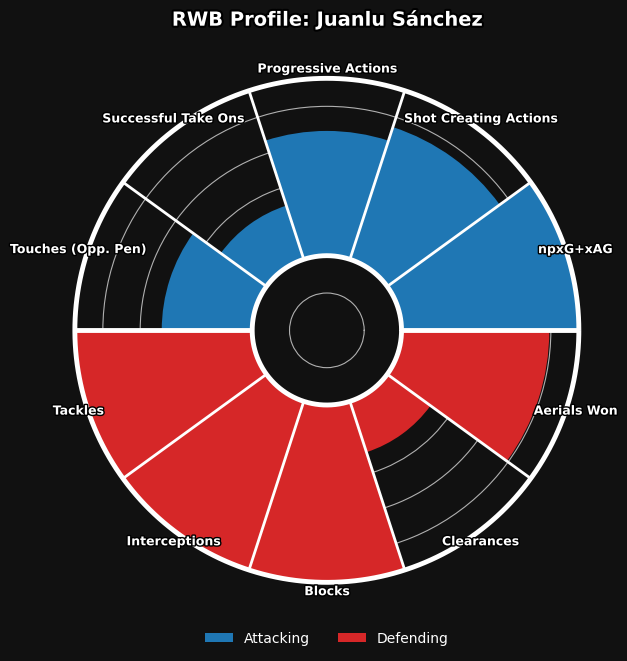

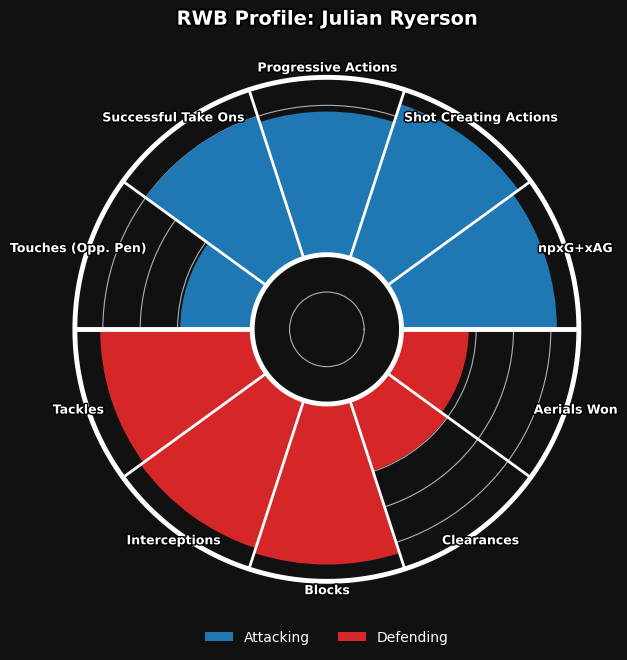

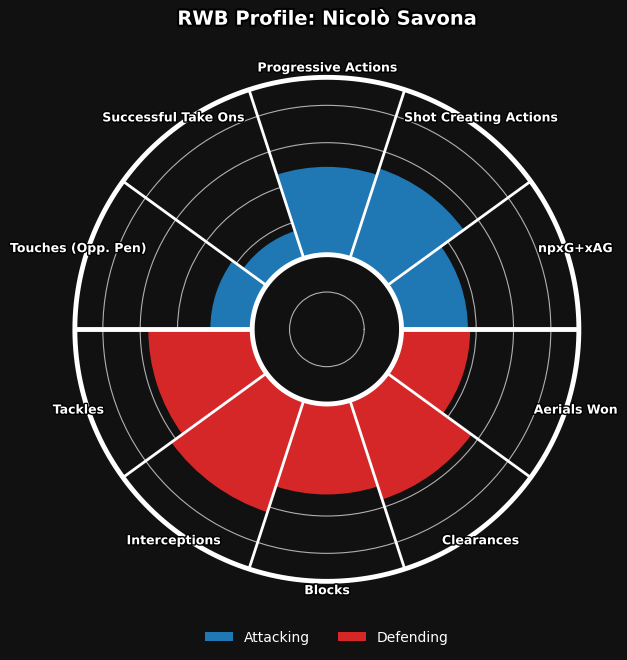

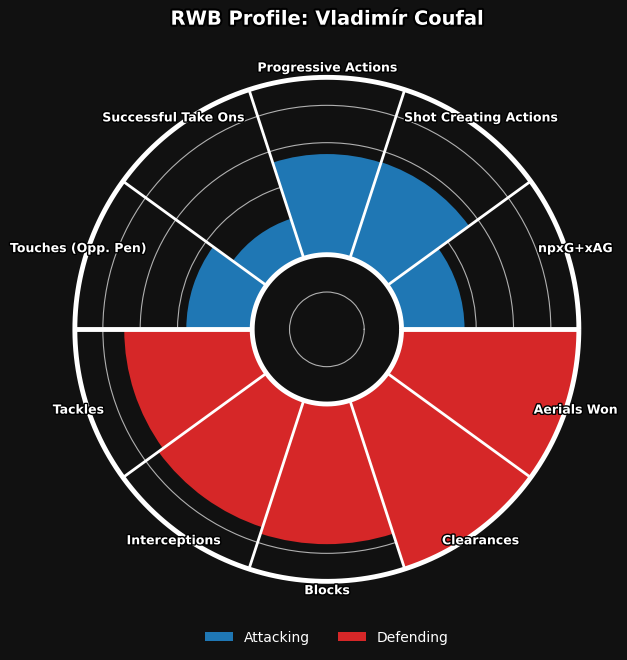

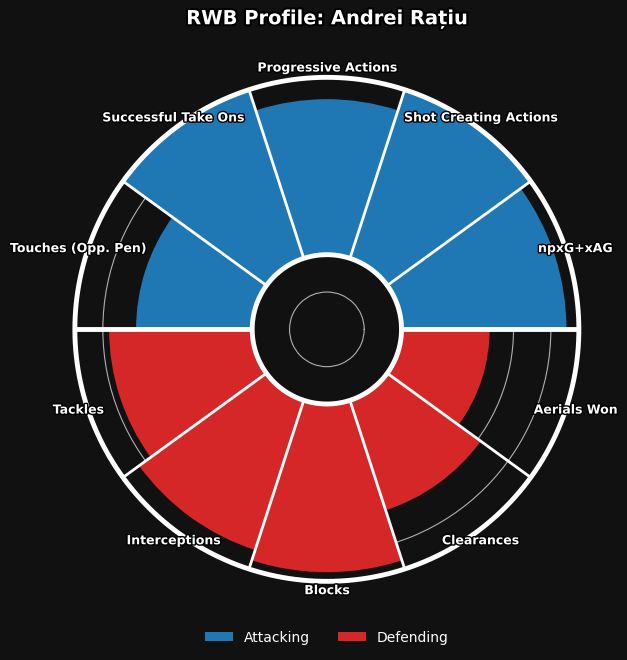

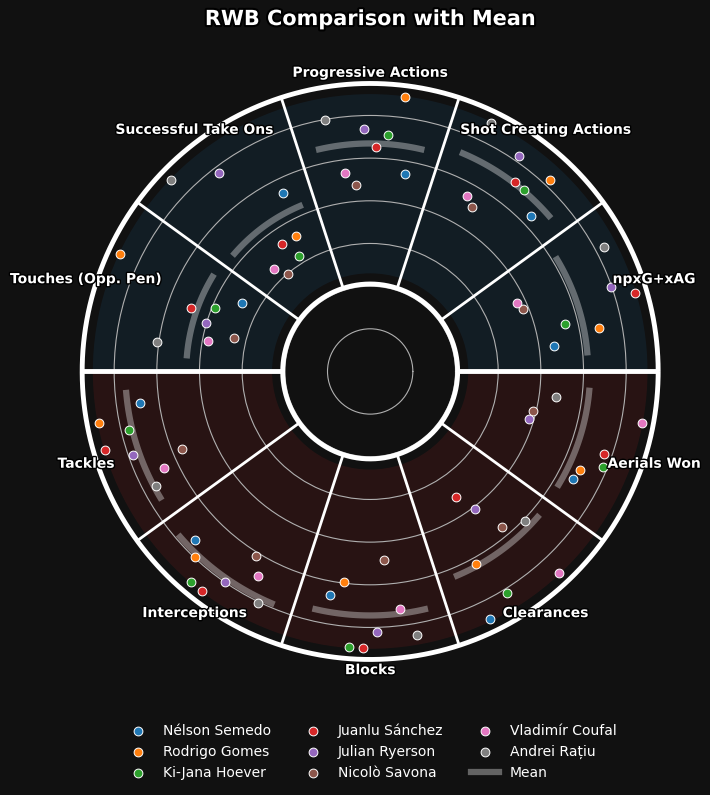

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects
from pathlib import Path

FILE = "wolves_standard_stats_scouted.xlsx"
df = pd.read_excel(FILE)

metrics = [
    'npxG+xAG90','SCA90','PrgA90','STO90','TAP90',
    'Tackles90','Int90','Blocks90','Clear90','AW90'
]
display_names = {
    'npxG+xAG90': 'npxG+xAG',
    'SCA90': 'Shot Creating Actions',
    'PrgA90': 'Progressive Actions',
    'STO90': 'Successful Take Ons',
    'TAP90': 'Touches (Opp. Pen)',
    'Tackles90': 'Tackles',
    'Int90': 'Interceptions',
    'Blocks90': 'Blocks',
    'Clear90': 'Clearances',
    'AW90': 'Aerials Won'
}

attacking = ['npxG+xAG90','SCA90','PrgA90','STO90','TAP90']
defending = ['Tackles90','Int90','Blocks90','Clear90','AW90']

FIG_BG = AX_BG = "#111111"
ATTACK_COLOR = "#1f77b4"
DEFEND_COLOR = "#d62728"
SEPARATOR_COLOR = "white" 
SEP_THIN  = 2.0
SEP_THICK = 3.5

rwb_df = df[df["Position"] == "RWB"].copy()
players = rwb_df["Player"].tolist()

p90 = df[metrics].quantile(0.90)
norm_df = rwb_df.copy()
for m in metrics:
    norm_df[m] = (rwb_df[m] / p90[m]).clip(upper=1.0)

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
width = 2*np.pi / len(metrics)
inner_radius = 0.35
outer_radius = inner_radius + 1.0
theta_circle = np.linspace(0, 2*np.pi, 720)
defend_start = len(attacking)
wedge_colors = [ATTACK_COLOR if m in attacking else DEFEND_COLOR for m in metrics]

#player
out_dir = Path("rwb_donuts_dark")
out_dir.mkdir(exist_ok=True)

PP_LEGEND_Y   = -0.15
PP_BOTTOM_PAD = 0.16

for name in players:
    vals = norm_df.loc[norm_df['Player'] == name, metrics].values.flatten()

    fig = plt.figure(figsize=(7, 7))
    fig.patch.set_facecolor(FIG_BG)
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor(AX_BG)
    ax.set_ylim(0, outer_radius)

    inner_circle_radius_overlay = inner_radius + 0.05
    scale = outer_radius - inner_circle_radius_overlay  # new usable radial span

    ax.bar(
        angles, vals * scale, width=width, bottom=inner_circle_radius_overlay,
        align='edge', color=wedge_colors, zorder=2
    )

    ax.set_xticks([]); ax.set_thetagrids([]); ax.set_yticklabels([])

    for ang in angles:
        ax.plot([ang, ang], [inner_circle_radius_overlay, outer_radius],
                linewidth=SEP_THIN, color=SEPARATOR_COLOR, alpha=1.0,
                solid_capstyle='butt', zorder=3)
    for b_ang in [angles[0], angles[defend_start]]:
        ax.plot([b_ang, b_ang], [inner_circle_radius_overlay, outer_radius],
                linewidth=SEP_THICK, color=SEPARATOR_COLOR, alpha=1.0,
                solid_capstyle='butt', zorder=4)

    ax.plot(theta_circle, np.full_like(theta_circle, outer_radius),
            color=SEPARATOR_COLOR, linewidth=SEP_THICK,  alpha=1.0,
            solid_capstyle='butt', zorder=5, clip_on=False)

    for ang, lab in zip(angles + width/2, [display_names[m] for m in metrics]):
        txt = ax.text(
            ang, inner_radius + 1.05, lab,
            rotation=0, ha='center', va='center',
            fontsize=9, fontweight='bold', color='white', zorder=6
        )
        txt.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()
        ])

    ax.plot(theta_circle, np.full_like(theta_circle, inner_circle_radius_overlay),
            color=SEPARATOR_COLOR, linewidth=SEP_THICK, alpha=1.0,
            solid_capstyle='butt', zorder=10, clip_on=False)

    title_text = ax.set_title(
        f"RWB Profile: {name}",
        va='bottom', y=1.08,
        fontsize=14, fontweight='bold', color='white'
    )
    title_text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

    legend_handles = [
        Patch(facecolor=ATTACK_COLOR, label="Attacking"),
        Patch(facecolor=DEFEND_COLOR, label="Defending"),
    ]
    leg = ax.legend(handles=legend_handles, loc='lower center',
                    bbox_to_anchor=(0.5, PP_LEGEND_Y), ncol=2, frameon=True)
    plt.setp(leg.get_texts(), color='white')
    leg.get_frame().set_facecolor(FIG_BG)
    leg.get_frame().set_edgecolor("none")

    plt.subplots_adjust(bottom=PP_BOTTOM_PAD)
    plt.savefig(out_dir / f"donut_{name.replace(' ', '_').replace('/', '_')}.png",
                dpi=200, bbox_inches="tight", facecolor=FIG_BG, pad_inches=0.25)
    plt.show()

players = [str(p).strip() for p in players]

#grouped
group_vals = norm_df.set_index('Player')[metrics]
means = group_vals.mean(axis=0).values
theta_centers = angles + width/2

n_players = len(players)
ang_offsets = np.linspace(-width*0.28, width*0.28, n_players) if n_players > 1 else np.array([0.0])

LEGEND_Y   = -0.18
BOTTOM_PAD = 0.24

# fig = plt.figure(figsize=(7, 7))
# fig.patch.set_facecolor(FIG_BG)
# ax = plt.subplot(111, polar=True)
# ax.set_facecolor(AX_BG)
# ax.set_ylim(0, outer_radius)

fig = plt.figure(figsize=(9, 9))
fig.patch.set_facecolor(FIG_BG)
ax = plt.subplot(111, polar=True)
ax.set_facecolor(AX_BG)
ax.set_ylim(0, outer_radius)

dot_inner_pad = 0.05
dot_outer_pad = 0.05

inner_circle_radius_overlay = inner_radius + 0.06
scale = (outer_radius - dot_outer_pad) - (inner_circle_radius_overlay + dot_inner_pad)
eps = 0.004

ax.bar(
    angles, np.full(len(metrics), 1.0) * scale, width=width,
    bottom=inner_circle_radius_overlay + dot_inner_pad, align='edge',
    color=wedge_colors, alpha=0.12, zorder=1, edgecolor=None
)

for ang in angles:
    ax.plot([ang, ang], [inner_circle_radius_overlay, outer_radius],
            linewidth=SEP_THIN, color=SEPARATOR_COLOR, alpha=1.0,
            solid_capstyle='butt', zorder=3)

for b_ang in [angles[0], angles[defend_start]]:
    ax.plot([b_ang, b_ang], [inner_circle_radius_overlay, outer_radius],
            linewidth=SEP_THICK, color=SEPARATOR_COLOR, alpha=1.0,
            solid_capstyle='butt', zorder=4)

mean_arc_half = width * 0.36
for i, mu in enumerate(means):
    r_mu = (inner_circle_radius_overlay + dot_inner_pad) + float(mu) * scale
    thetas = np.linspace(theta_centers[i] - mean_arc_half, theta_centers[i] + mean_arc_half, 80)
    ax.plot(thetas, np.full_like(thetas, r_mu),
            color=SEPARATOR_COLOR, linewidth=4.5, alpha=0.35, zorder=6, clip_on=False)

ax.plot(theta_circle, np.full_like(theta_circle, outer_radius),
        color=SEPARATOR_COLOR, linewidth=SEP_THICK, alpha=1.0,
        solid_capstyle='butt', zorder=7, clip_on=False)

for j, p in enumerate(players):
    vals = group_vals.loc[p].values
    thetas = theta_centers + ang_offsets[j]
    rs = (inner_circle_radius_overlay + dot_inner_pad) + vals * scale
    rs = np.clip(rs, inner_circle_radius_overlay + dot_inner_pad + eps,
                 outer_radius - dot_outer_pad - eps)
    ax.scatter(
        thetas, rs, s=40, color=plt.cm.tab10(j % 10),
        edgecolor='white', linewidth=0.7, zorder=7.5, label=p, clip_on=False
    )

for ang, lab in zip(theta_centers, [display_names[m] for m in metrics]):
    txt = ax.text(
        ang, inner_radius + 1.05, lab,
        rotation=0, ha='center', va='center',
        fontsize=10, fontweight='bold', color='white', zorder=8, clip_on=False
    )
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

ax.plot(theta_circle, np.full_like(theta_circle, inner_circle_radius_overlay),
        color=SEPARATOR_COLOR, linewidth=SEP_THICK, alpha=1.0,
        solid_capstyle='butt', zorder=10, clip_on=False)

title_text = ax.set_title(
    "RWB Comparison with Mean",
    va='bottom', y=1.08,
    fontsize=15, fontweight='bold', color='white'
)
title_text.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground='black'),
    path_effects.Normal()
])

ax.set_xticks([]); ax.set_thetagrids([]); ax.set_yticklabels([])

mean_legend = plt.Line2D([0], [0], color=SEPARATOR_COLOR, lw=4.5, alpha=0.35, label="Mean")
handles, labels = ax.get_legend_handles_labels()
handles.append(mean_legend); labels.append("Mean")
leg = ax.legend(handles, labels, loc='lower center',
                bbox_to_anchor=(0.5, LEGEND_Y - 0.05), ncol=3, frameon=True)
plt.setp(leg.get_texts(), color='white')
leg.get_frame().set_facecolor(FIG_BG)
leg.get_frame().set_edgecolor("none")

plt.subplots_adjust(bottom=BOTTOM_PAD)

#for notebook only display, comment out save:
#plt.savefig("rwb_group_donut_dark.png", dpi=200, bbox_inches="tight", facecolor=FIG_BG, pad_inches=0.3)
plt.show()


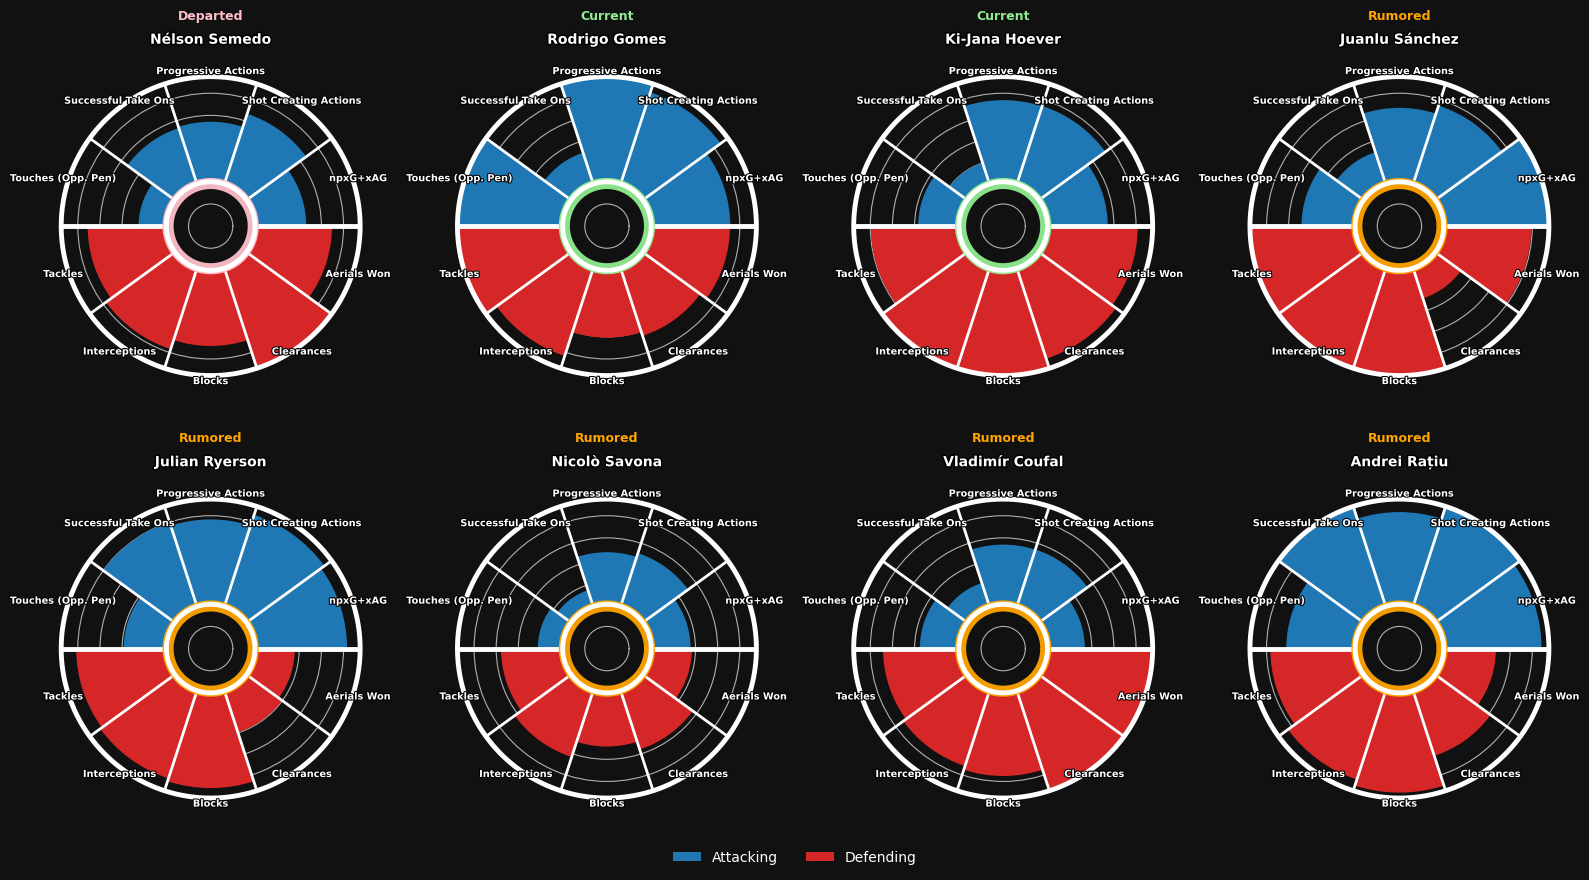

In [67]:
STATUS_COLORS = {"Current": "lightgreen", "Rumored": "orange", "Departed": "pink"}
status_raw = rwb_df["Status"].fillna("").astype(str).str.strip().str.lower()
def _status_label(s):
    if s == "left": return "Departed"
    if s == "rumor": return "Rumored"
    return "Current"
status_labels = status_raw.map(_status_label)
status_by_player = dict(zip(rwb_df["Player"], status_labels))
status_colors_by_player = {p: STATUS_COLORS[status_by_player[p]] for p in players}

n_players = len(players)
ncols = 4
nrows = int(np.ceil(n_players / ncols))

fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, subplot_kw=dict(polar=True),
    figsize=(ncols * 4, nrows * 4.5)
)
axs = axs.flatten()

for i, name in enumerate(players):
    vals = norm_df.loc[norm_df['Player'] == name, metrics].values.flatten()
    ax = axs[i]
    ax.set_facecolor(AX_BG)
    ax.set_ylim(0, outer_radius)
    inner_circle_radius_overlay = inner_radius + 0.05
    scale = outer_radius - inner_circle_radius_overlay
    ax.bar(
        angles, vals * scale, width=width, bottom=inner_circle_radius_overlay,
        align='edge', color=wedge_colors, zorder=2
    )
    for ang in angles:
        ax.plot([ang, ang], [inner_circle_radius_overlay, outer_radius],
                linewidth=SEP_THIN, color=SEPARATOR_COLOR, zorder=3, solid_capstyle='butt')
    for b_ang in [angles[0], angles[defend_start]]:
        ax.plot([b_ang, b_ang], [inner_circle_radius_overlay, outer_radius],
                linewidth=SEP_THICK, color=SEPARATOR_COLOR, zorder=4, solid_capstyle='butt')
    ax.plot(theta_circle, np.full_like(theta_circle, outer_radius),
            color=SEPARATOR_COLOR, linewidth=SEP_THICK, zorder=5, clip_on=False, solid_capstyle='butt')
    for ang, lab in zip(angles + width/2, [display_names[m] for m in metrics]):
        txt = ax.text(
            ang, inner_radius + 1.05, lab,
            rotation=0, ha='center', va='center',
            fontsize=7, fontweight='bold', color='white', zorder=6
        )
        txt.set_path_effects([
            path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()
        ])
    status_ring_r = inner_radius + 0.035
    ax.plot(theta_circle, np.full_like(theta_circle, status_ring_r),
            color=status_colors_by_player[name], linewidth=8, zorder=9, solid_capstyle='butt', alpha=0.95)
    ax.plot(theta_circle, np.full_like(theta_circle, inner_circle_radius_overlay),
            color=SEPARATOR_COLOR, linewidth=SEP_THICK, zorder=10, clip_on=False, solid_capstyle='butt')
    ax.text(0.5, 1.18, status_by_player[name],
            transform=ax.transAxes, ha='center', va='bottom',
            fontsize=9, fontweight='bold', color=status_colors_by_player[name])
    title_text = ax.text(
        0.5, 1.10, name,
        transform=ax.transAxes, ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='white'
    )
    title_text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])
    ax.set_xticks([])
    ax.set_thetagrids([])
    ax.set_yticklabels([])

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

fig.patch.set_facecolor(FIG_BG)

legend_handles = [
    Patch(facecolor=ATTACK_COLOR, label="Attacking"),
    Patch(facecolor=DEFEND_COLOR, label="Defending"),
    # Patch(facecolor=STATUS_COLORS["Current"], label="Current"),
    # Patch(facecolor=STATUS_COLORS["Rumored"], label="Rumored"),
    # Patch(facecolor=STATUS_COLORS["Departed"], label="Departed"),
]
leg = fig.legend(
    handles=legend_handles, loc='lower center', ncol=5,
    bbox_to_anchor=(0.5, 0.02), frameon=True
)
plt.setp(leg.get_texts(), color='white')
leg.get_frame().set_facecolor(FIG_BG)
leg.get_frame().set_edgecolor("none")

plt.tight_layout(rect=[0, 0.06, 1, 1], h_pad=3.0)
plt.show()


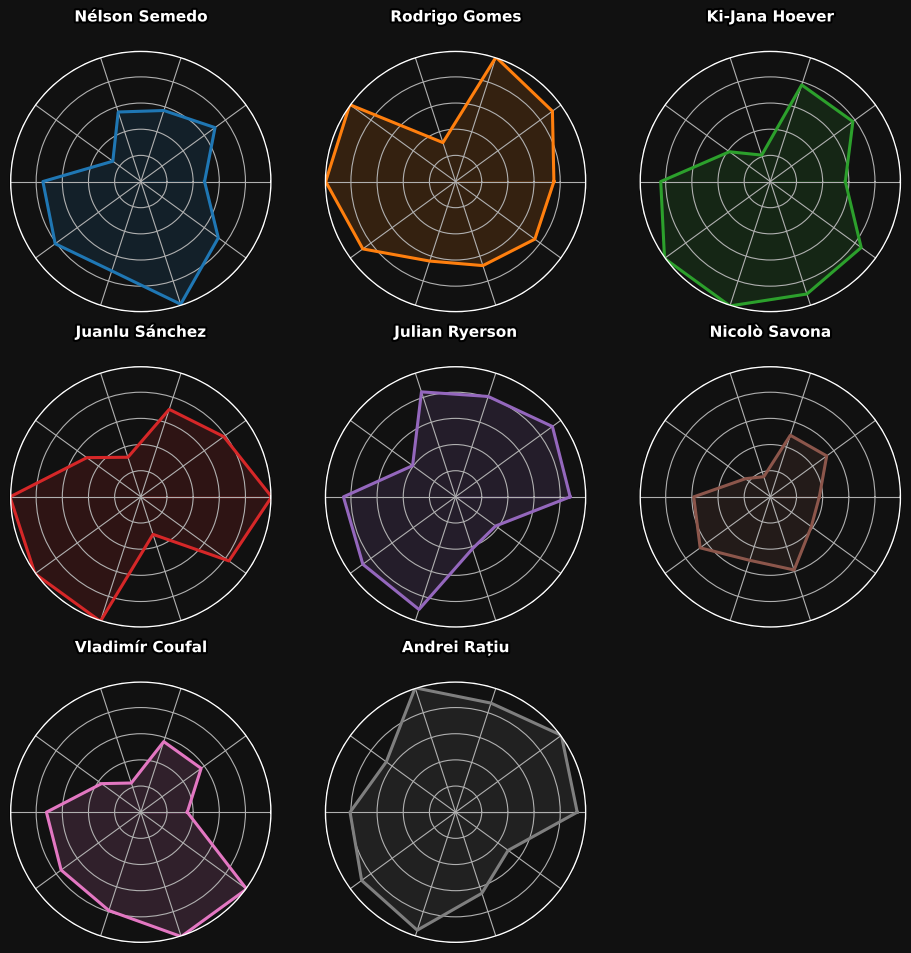

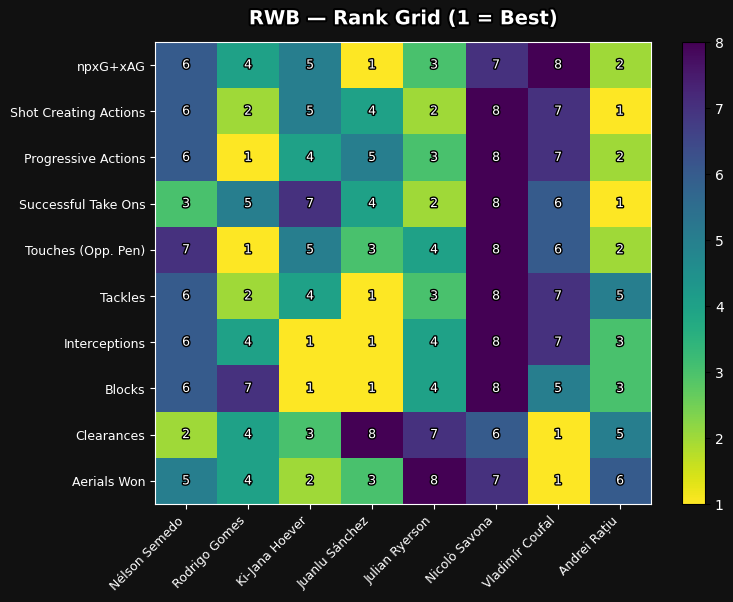

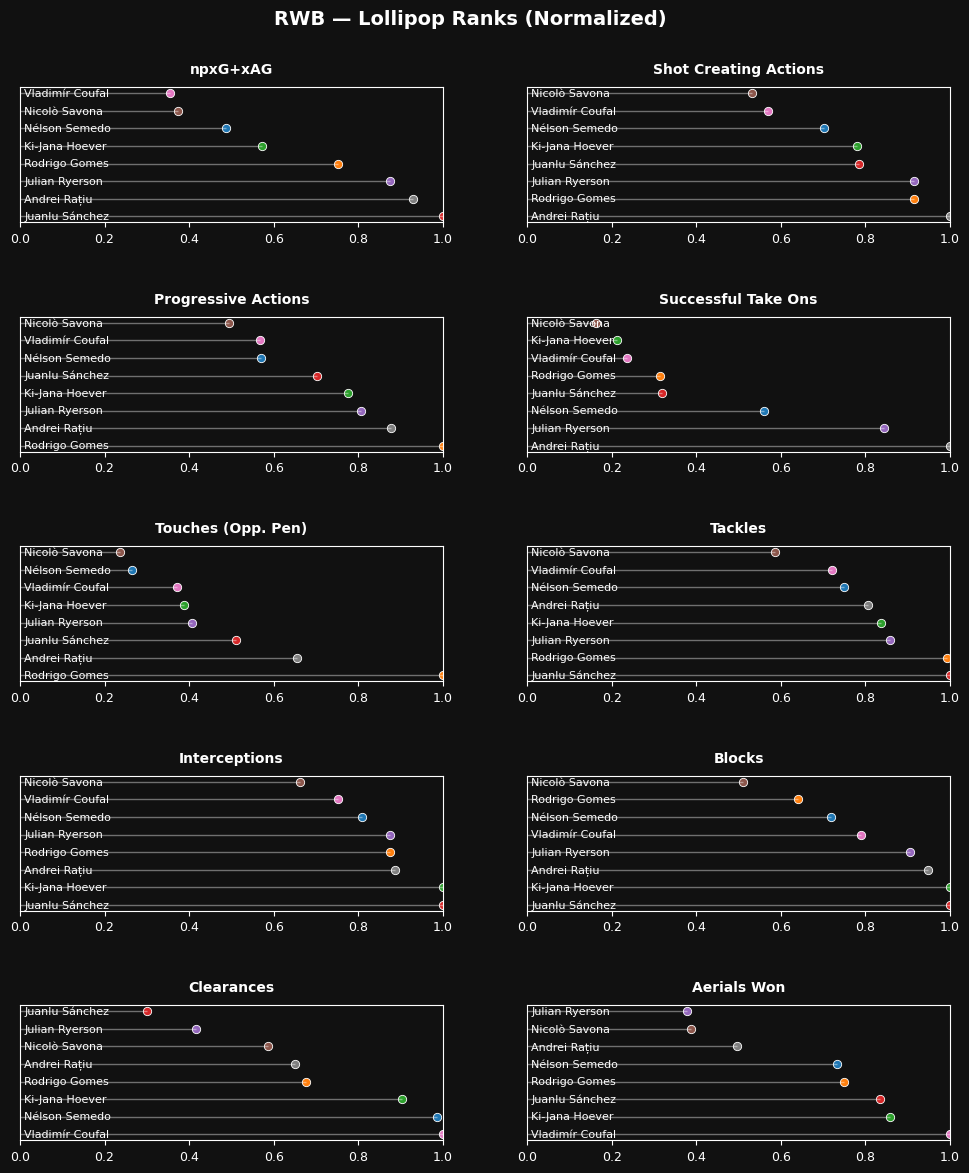

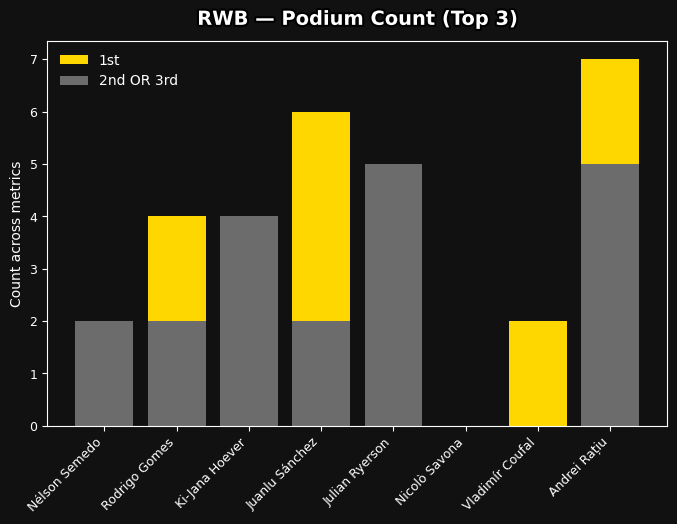

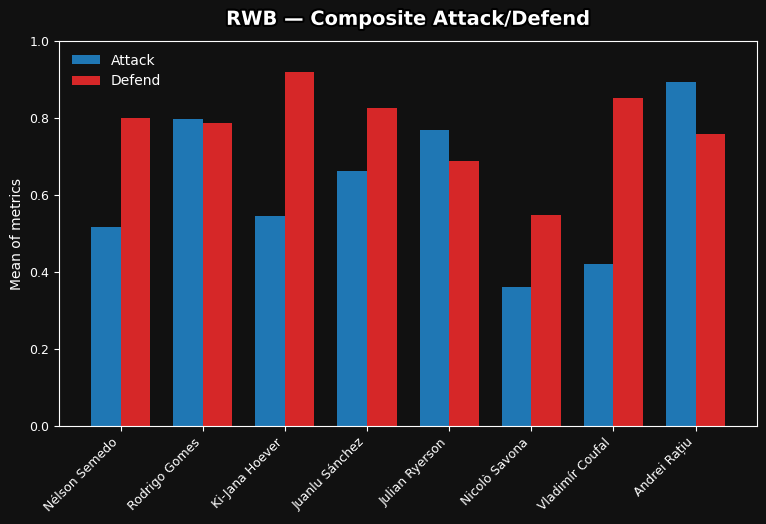

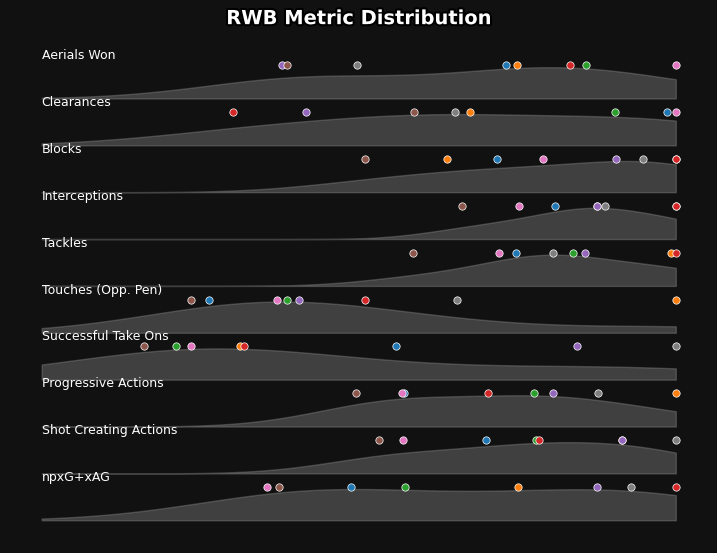

In [77]:
# IMPORTANT:
# These are generated by chat for more advanced visualization schemes

# =========================
# FULLY-STYLED RWB VIS TOOLKIT
# =========================
import math
from collections import defaultdict

# ---------- helpers ----------
def _dark_fig_ax(size=(7,7)):
    fig = plt.figure(figsize=size)
    fig.patch.set_facecolor(FIG_BG)
    ax = plt.subplot(111)
    ax.set_facecolor(AX_BG)
    return fig, ax

def _style_axes(ax):
    ax.tick_params(colors='white', labelsize=9)
    for spine in ax.spines.values():
        spine.set_color('white')

def _title(ax, text, y=1.02, size=14):
    t = ax.set_title(text, color='white', fontsize=size, fontweight='bold', y=y)
    t.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

# def _save(fig, name, pad=0.3):
#     path = out_dir / name
#     fig.savefig(path, dpi=200, bbox_inches="tight", facecolor=FIG_BG, pad_inches=pad)
#     plt.close(fig)
#     print(f"Saved: {path}")

def _save(fig, name=None, pad=0.3):
    plt.show()
    plt.close(fig)

def _names_for_metrics(mets):
    return [display_names[m] for m in mets]

def _attack_defend_split(df_values):
    A = df_values[attacking].mean(axis=1)
    D = df_values[defending].mean(axis=1)
    return A, D

# A z-score transform (columns)
def _zscore(M):
    return (M - M.mean()) / (M.std(ddof=0).replace(0, 1))

# consistent player color map
player_cmap = {p: plt.cm.tab10(i % 10) for i,p in enumerate(players)}

# Base matrix (players x metrics) on your normalized 0–1 values
M = norm_df.set_index('Player')[metrics].loc[players]

# ============================================
# 1) Z-score heatmap (players x metrics)
# ============================================
def vis_heatmap_zscore():
    mat = _zscore(M.copy())
    fig, ax = _dark_fig_ax((7,7))
    im = ax.imshow(mat.values, aspect='auto', cmap='coolwarm')
    ax.set_yticks(range(len(players)))
    ax.set_yticklabels(players, color='white', fontsize=9)
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(_names_for_metrics(metrics), rotation=45, ha='right', color='white', fontsize=8)
    _style_axes(ax)
    _title(ax, "RWB — Metric Heatmap (z-score)")
    cbar = fig.colorbar(im)
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
    _save(fig, "rwb_heatmap_zscore.png")

# ============================================
# 2) Beeswarm / strip by metric (1 axis)
# ============================================
def vis_beeswarm():
    fig, ax = _dark_fig_ax((7,7))
    y_positions = np.arange(len(metrics))
    for i, m in enumerate(metrics):
        xs = M[m].values
        y = np.full_like(xs, y_positions[i], dtype=float) + (np.random.rand(len(xs))-0.5) * 0.25
        for x, yy, p in zip(xs, y, players):
            ax.scatter(x, yy, s=36, color=player_cmap[p], edgecolor='white', linewidth=0.6, zorder=2)
    # means
    means = M.mean(axis=0).values
    ax.scatter(means, y_positions, s=80, facecolors='none', edgecolor='white', linewidth=1.4, zorder=3)
    ax.set_yticks(y_positions)
    ax.set_yticklabels(_names_for_metrics(metrics), color='white', fontsize=9)
    ax.set_xlabel("Normalized value (0–1)", color='white')
    _style_axes(ax)
    _title(ax, "RWB — Beeswarm by Metric (w/ means)")
    _save(fig, "rwb_beeswarm.png")

# ============================================
# 3) Parallel coordinates (polylines)
# ============================================
# def vis_parallel_coords():
#     fig, ax = _dark_fig_ax((7,7))
#     x = np.arange(len(metrics))
#     for p in players:
#         ax.plot(x, M.loc[p].values, color=player_cmap[p], alpha=0.9, linewidth=2, label=p)
#     ax.set_xlim(x.min(), x.max())
#     ax.set_ylim(0, 1)
#     ax.set_xticks(x)
#     ax.set_xticklabels(_names_for_metrics(metrics), rotation=45, ha='right', color='white', fontsize=8)
#     ax.set_ylabel("Normalized (0–1)", color='white')
#     _style_axes(ax)
#     _title(ax, "RWB — Parallel Coordinates")
#     leg = ax.legend(frameon=True, ncol=2, loc='upper left')
#     for txt in leg.get_texts(): txt.set_color('white')
#     leg.get_frame().set_facecolor(FIG_BG); leg.get_frame().set_edgecolor("none")
#     _save(fig, "rwb_parallel_coords.png")

# ============================================
# 4) Bump chart of ranks
# ============================================
# def vis_bump_ranks():
#     ranks = M.rank(axis=0, ascending=False)  # 1 best
#     fig, ax = _dark_fig_ax((7,7))
#     x = np.arange(len(metrics))
#     for p in players:
#         y = ranks.loc[p].values
#         ax.plot(x, y, marker='o', linewidth=2, color=player_cmap[p], label=p)
#     ax.invert_yaxis()
#     ax.set_yticks(range(1, len(players)+1))
#     ax.set_xticks(x)
#     ax.set_xticklabels(_names_for_metrics(metrics), rotation=45, ha='right', color='white', fontsize=8)
#     ax.set_ylabel("Rank (1 best)", color='white')
#     _style_axes(ax)
#     _title(ax, "RWB — Bump Chart (Ranks)")
#     leg = ax.legend(frameon=True, ncol=2, loc='upper left')
#     for txt in leg.get_texts(): txt.set_color('white')
#     leg.get_frame().set_facecolor(FIG_BG); leg.get_frame().set_edgecolor("none")
#     _save(fig, "rwb_bump_ranks.png")

# ============================================
# 5) Radar small multiples (grid)
# ============================================
def vis_radar_small_multiples():
    n = len(players)
    cols = 3
    rows = math.ceil(n/cols)
    fig = plt.figure(figsize=(cols*3.2, rows*3.2))
    fig.patch.set_facecolor(FIG_BG)
    angles_p = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    for i, p in enumerate(players, 1):
        ax = plt.subplot(rows, cols, i, polar=True)
        ax.set_facecolor(AX_BG); ax.set_ylim(0,1)
        vals = M.loc[p].values
        ax.plot(np.append(angles_p, angles_p[0]), np.append(vals, vals[0]), color=player_cmap[p], linewidth=2.2)
        ax.fill_between(np.append(angles_p, angles_p[0]), 0, np.append(vals, vals[0]),
                        color=player_cmap[p], alpha=0.15)
        ax.set_xticks(angles_p); ax.set_yticklabels([]); ax.set_xticklabels([])
        # inner/outer rings
        ax.plot(np.linspace(0,2*np.pi,720), np.full(720, 0), color=SEPARATOR_COLOR, lw=SEP_THICK, alpha=1.0, zorder=5)
        ax.plot(np.linspace(0,2*np.pi,720), np.full(720, 1), color=SEPARATOR_COLOR, lw=SEP_THIN, alpha=1.0, zorder=5)
        t = ax.set_title(p, color='white', fontsize=11, y=1.08, fontweight='bold')
        t.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
    plt.tight_layout()
    _save(fig, "rwb_radar_small_multiples.png", pad=0.2)

# ============================================
# 6) Polar bar “petals” per player (small multiples)
# ============================================
# def vis_polar_petals():
#     n = len(players)
#     cols = 3
#     rows = math.ceil(n/cols)
#     fig = plt.figure(figsize=(cols*3.2, rows*3.2))
#     fig.patch.set_facecolor(FIG_BG)
#     angles_p = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
#     width_p = 2*np.pi/len(metrics)
#     for i, p in enumerate(players, 1):
#         ax = plt.subplot(rows, cols, i, polar=True)
#         ax.set_facecolor(AX_BG); ax.set_ylim(0,1)
#         vals = M.loc[p].values
#         colors = [ATTACK_COLOR if m in attacking else DEFEND_COLOR for m in metrics]
#         ax.bar(angles_p, vals, width=width_p, bottom=0.0, align='edge', color=colors, zorder=2)
#         ax.set_xticks([]); ax.set_yticklabels([])
#         ax.plot(np.linspace(0,2*np.pi,720), np.full(720, 0), color=SEPARATOR_COLOR, lw=SEP_THICK, alpha=1.0, zorder=5)
#         ax.plot(np.linspace(0,2*np.pi,720), np.full(720, 1), color=SEPARATOR_COLOR, lw=SEP_THIN, alpha=1.0, zorder=5)
#         t = ax.set_title(p, color='white', fontsize=11, y=1.08, fontweight='bold')
#         t.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
#     plt.tight_layout()
#     _save(fig, "rwb_polar_petals.png", pad=0.2)

# ============================================
# 7) Attack/Defend balance (polar scatter)
# ============================================
# def vis_balance_polar():
#     fig = plt.figure(figsize=(7,7))
#     fig.patch.set_facecolor(FIG_BG)
#     ax = plt.subplot(111, polar=True)
#     ax.set_facecolor(AX_BG)
#     A, D = _attack_defend_split(M)
#     # angle encodes balance (0 = pure attack, pi/2 = pure defend), radius = volume
#     angle = np.arctan2(D.values, A.values)   # 0..pi/2 typically
#     radius = (A.values + D.values) / 2.0
#     ax.set_ylim(0, 1)
#     for th, r, p in zip(angle, radius, players):
#         ax.scatter(th, r, s=120, color=player_cmap[p], edgecolor='white', linewidth=0.8, label=p)
#         ax.text(th, r+0.04, p, color='white', ha='center', va='bottom', fontsize=8)
#     # guide lines
#     ax.plot([0, np.pi/2], [0,0], color='white', lw=1, alpha=0.4)
#     ax.set_xticks([0, np.pi/4, np.pi/2])
#     ax.set_xticklabels(["Attack bias", "Balanced", "Defend bias"], color='white')
#     ax.set_yticklabels([])
#     _title(ax, "RWB — Attack/Defend Balance (Polar)")
#     _save(fig, "rwb_balance_polar.png")

# ============================================
# 8) Rank grid (metric x player, numbers)
# ============================================
import matplotlib.patheffects as path_effects

def vis_rank_grid():
    ranks = M.rank(axis=0, ascending=False).astype(int)
    fig, ax = _dark_fig_ax((8,6))
    im = ax.imshow(ranks.values.T, aspect='auto', cmap='viridis_r')
    ax.set_yticks(range(len(metrics)))
    ax.set_yticklabels(_names_for_metrics(metrics), color='white', fontsize=9)
    ax.set_xticks(range(len(players)))
    ax.set_xticklabels(players, rotation=45, ha='right', color='white', fontsize=8)
    for i in range(len(players)):
        for j in range(len(metrics)):
            val = ranks.values[i, j]
            txt = ax.text(i, j, str(val), ha='center', va='center',
                          color='white', fontsize=9, zorder=3)
            txt.set_path_effects([
                path_effects.Stroke(linewidth=2, foreground='black'),
                path_effects.Normal()
            ])
    _style_axes(ax)
    _title(ax, "RWB — Rank Grid (1 = Best)")
    cbar = fig.colorbar(im)
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
    _save(fig, "rwb_rank_grid.png")


# ============================================
# 9) Lollipop ranks per metric (multi-panel)
# ============================================
def vis_lollipop_ranks():
    r, c = 5, 2
    pages = math.ceil(len(metrics)/(r*c))
    for page in range(pages):
        fig = plt.figure(figsize=(c*6, r*2.6))
        fig.patch.set_facecolor(FIG_BG)
        for k in range(r*c):
            idx = page*(r*c)+k
            if idx >= len(metrics): break
            m = metrics[idx]
            ax = plt.subplot(r, c, k+1)
            ax.set_facecolor(AX_BG)
            s = M.sort_values(by=m, ascending=False)[m]
            ax.hlines(y=np.arange(len(s)), xmin=0, xmax=s.values, color='white', lw=1, alpha=0.4)
            for i,(p,val) in enumerate(s.items()):
                ax.scatter(val, i, s=36, color=player_cmap[p], edgecolor='white', linewidth=0.6)
                ax.text(0.01, i, p, va='center', color='white', fontsize=8)
            ax.set_yticks([])
            ax.set_xlim(0,1)
            ax.set_xlabel(None)
            ax.set_title(display_names[m], color='white', fontsize=10, fontweight='bold', pad=10)
            _style_axes(ax)
        fig.suptitle("RWB — Lollipop Ranks (Normalized)", y=0.98, color='white', fontsize=14, fontweight='bold')
        plt.subplots_adjust(top=0.92, hspace=0.7)
        _save(fig, f"rwb_lollipop_ranks_p{page+1}.png", pad=0.3)


# ============================================
# 10) Medal table (top1/top3 counts)
# ============================================
def vis_medal_table():
    counts_top1 = defaultdict(int)
    counts_top3 = defaultdict(int)
    for m in metrics:
        s = M.sort_values(by=m, ascending=False)[m]
        counts_top1[s.index[0]] += 1
        for p in s.index[:3]: counts_top3[p] += 1
    fig, ax = _dark_fig_ax((8,5))
    x = np.arange(len(players))
    top3_only = np.array([counts_top3[p]-counts_top1[p] for p in players])
    ax.bar(x, [counts_top1[p] for p in players], bottom=top3_only, color="#ffd700", label="1st")
    ax.bar(x, top3_only, color="#aaaaaa", alpha=0.6, label="2nd OR 3rd")
    ax.set_xticks(x); ax.set_xticklabels(players, rotation=45, ha='right', color='white')
    ax.set_ylabel("Count across metrics", color='white')
    _style_axes(ax); _title(ax, "RWB — Podium Count (Top 3)")
    leg = ax.legend(frameon=True)
    for txt in leg.get_texts(): txt.set_color('white')
    leg.get_frame().set_facecolor(FIG_BG); leg.get_frame().set_edgecolor("none")
    _save(fig, "rwb_medal_table.png")

# ============================================
# 11) PCA 2D map (similarity)
# ============================================
# def vis_pca_map():
#     try:
#         from sklearn.decomposition import PCA
#     except Exception as e:
#         print("sklearn not available — skipping PCA map.")
#         return
#     X = M.values
#     pca = PCA(n_components=2)
#     Z = pca.fit_transform(X)
#     fig, ax = _dark_fig_ax((7,7))
#     for (x,y), p in zip(Z, players):
#         ax.scatter(x, y, s=120, color=player_cmap[p], edgecolor='white', linewidth=0.8)
#         ax.text(x, y+0.03, p, color='white', fontsize=9, ha='center')
#     ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)", color='white')
#     ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)", color='white')
#     _style_axes(ax); _title(ax, "RWB — PCA Similarity Map")
#     _save(fig, "rwb_pca.png")

# ============================================
# 12) Dendrogram (hierarchical clustering)
# ============================================
# def vis_dendrogram():
#     try:
#         from scipy.cluster.hierarchy import linkage, dendrogram
#     except Exception:
#         print("scipy not available — skipping dendrogram.")
#         return
#     X = M.values
#     Z = linkage(X, method='ward')
#     fig, ax = _dark_fig_ax((10,5))
#     dendrogram(Z, labels=players, leaf_rotation=0, leaf_font_size=9, color_threshold=None, above_threshold_color='white')
#     for tick in ax.get_xticklabels(): tick.set_color('white')
#     for tick in ax.get_yticklabels(): tick.set_color('white')
#     _style_axes(ax); _title(ax, "RWB — Hierarchical Clustering Dendrogram")
#     _save(fig, "rwb_dendrogram.png")

# ============================================
# 13) Composite score bar (Attack vs Defend)
# ============================================
def vis_composite_bars():
    A, D = _attack_defend_split(M)
    fig, ax = _dark_fig_ax((9,5))
    x = np.arange(len(players))
    ax.bar(x-0.18, A.values, width=0.36, color=ATTACK_COLOR, label="Attack")
    ax.bar(x+0.18, D.values, width=0.36, color=DEFEND_COLOR, label="Defend")
    ax.set_xticks(x); ax.set_xticklabels(players, rotation=45, ha='right', color='white')
    ax.set_ylim(0,1); ax.set_ylabel("Mean of metrics", color='white')
    _style_axes(ax); _title(ax, "RWB — Composite Attack/Defend")
    leg = ax.legend(frameon=True)
    for txt in leg.get_texts(): txt.set_color('white')
    leg.get_frame().set_facecolor(FIG_BG); leg.get_frame().set_edgecolor("none")
    _save(fig, "rwb_composite_bars.png")

# ============================================
# 14) Balance index scatter (Attack vs Defend)
# ============================================
# def vis_balance_scatter():
#     A, D = _attack_defend_split(M)
#     fig, ax = _dark_fig_ax((7,7))
#     for p, x, y in zip(players, A.values, D.values):
#         ax.scatter(x, y, s=120, color=player_cmap[p], edgecolor='white', linewidth=0.8)
#         ax.text(x, y+0.02, p, color='white', fontsize=9, ha='center')
#     # guide lines
#     ax.plot([0,1], [0,1], color='white', alpha=0.3)
#     ax.set_xlim(0,1); ax.set_ylim(0,1)
#     ax.set_xlabel("Attack composite", color='white'); ax.set_ylabel("Defend composite", color='white')
#     _style_axes(ax); _title(ax, "RWB — Balance (Attack vs Defend)")
#     _save(fig, "rwb_balance_scatter.png")

# ============================================
# 15) Spider overlay: mean + top & bottom (by total score)
# ============================================
# def vis_spider_overlay():
#     totals = M.sum(axis=1)
#     top = totals.idxmax(); bot = totals.idxmin()
#     mean_vals = M.mean(axis=0).values
#     ang = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
#     fig = plt.figure(figsize=(7,7)); fig.patch.set_facecolor(FIG_BG)
#     ax = plt.subplot(111, polar=True); ax.set_facecolor(AX_BG); ax.set_ylim(0,1)
#     # mean
#     ax.plot(np.append(ang, ang[0]), np.append(mean_vals, mean_vals[0]),
#             color='white', lw=2.5, alpha=0.8, label='Mean')
#     # top and bottom
#     for p, lw, alp in [(top, 2.2, 1.0), (bot, 2.2, 0.9)]:
#         v = M.loc[p].values
#         ax.plot(np.append(ang, ang[0]), np.append(v, v[0]),
#                 color=player_cmap[p], lw=lw, alpha=alp, label=p)
#     ax.set_xticks(ang); ax.set_xticklabels(_names_for_metrics(metrics), color='white', fontsize=8)
#     ax.set_yticklabels([])
#     _title(ax, "RWB — Spider Overlay (Mean + Top/Bottom)")
#     leg = ax.legend(frameon=True, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=3)
#     for txt in leg.get_texts(): txt.set_color('white')
#     leg.get_frame().set_facecolor(FIG_BG); leg.get_frame().set_edgecolor("none")
#     _save(fig, "rwb_spider_overlay.png", pad=0.25)

# ============================================
# 16) Boxplots per metric
# ============================================
# def vis_boxplots():
#     fig, ax = _dark_fig_ax((8,6))
#     bp = ax.boxplot([M[m].values for m in metrics], patch_artist=True)
#     for patch in bp['boxes']:
#         patch.set_facecolor("#444444"); patch.set_alpha(0.6); patch.set_edgecolor('white')
#     for med in bp['medians']: med.set_color('white')
#     for whisk in bp['whiskers']: whisk.set_color('white')
#     for cap in bp['caps']: cap.set_color('white')
#     for fl in bp['fliers']: fl.set(marker='o', markerfacecolor='white', markeredgecolor='white')
#     ax.set_xticklabels(_names_for_metrics(metrics), rotation=45, ha='right', color='white', fontsize=8)
#     ax.set_ylim(0,1); ax.set_ylabel("Normalized (0–1)", color='white')
#     _style_axes(ax); _title(ax, "RWB — Boxplots per Metric")
#     _save(fig, "rwb_boxplots.png")

# ============================================
# 17) Similarity network (thresholded cosine)
# ============================================
# def vis_similarity_network(thresh=0.9):
#     # cosine similarity
#     X = M.values
#     norms = np.linalg.norm(X, axis=1, keepdims=True) + 1e-9
#     U = X / norms
#     S = U @ U.T
#     # build coordinates via PCA for layout
#     try:
#         from sklearn.decomposition import PCA
#         coords = PCA(n_components=2).fit_transform(X)
#     except Exception:
#         # fallback: circle layout
#         t = np.linspace(0, 2*np.pi, len(players), endpoint=False)
#         coords = np.c_[np.cos(t), np.sin(t)]
#     fig, ax = _dark_fig_ax((7,7))
#     # edges
#     for i in range(len(players)):
#         for j in range(i+1, len(players)):
#             if S[i,j] >= thresh:
#                 x1,y1 = coords[i]; x2,y2 = coords[j]
#                 ax.plot([x1,x2],[y1,y2], color='white', alpha=0.3, linewidth=2*(S[i,j]-thresh+0.01))
#     # nodes
#     for (x,y), p in zip(coords, players):
#         ax.scatter(x, y, s=160, color=player_cmap[p], edgecolor='white', linewidth=0.8)
#         ax.text(x, y+0.05, p, color='white', fontsize=9, ha='center')
#     ax.set_xticks([]); ax.set_yticks([])
#     _style_axes(ax); _title(ax, f"RWB — Similarity Network (cos ≥ {thresh:.2f})")
#     _save(fig, "rwb_similarity_network.png")

# ============================================
# 18) Metric ridge-like density (approx — small N)
# ============================================
def vis_ridgeline_like():
    # With 7 players densities are rough; we use simple KDE per metric.
    try:
        from scipy.stats import gaussian_kde
    except Exception:
        print("scipy not available — skipping ridgeline-like.")
        return
    rows = len(metrics)
    fig, ax = _dark_fig_ax((9, rows*0.45 + 2))
    ax.set_axis_off()
    x = np.linspace(0,1,256)
    base_y = 0
    gap = 1.2
    for i, m in enumerate(metrics):
        vals = M[m].values
        kde = gaussian_kde(vals, bw_method='scott')
        y = kde(x)
        y = y / y.max()  # normalize height
        y = y*0.8
        ax.fill_between(x, base_y, base_y + y, color="#888888", alpha=0.4)
        # dots
        for v,p in zip(vals, players):
            ax.scatter(v, base_y + 0.85, s=28, color=player_cmap[p], edgecolor='white', linewidth=0.5, zorder=3)
        ax.text(0.0, base_y + 0.95, display_names[m], color='white', fontsize=9, va='bottom')
        base_y += gap
    _title(ax, "RWB Metric Distribution", y=1.02)
    _save(fig, "rwb_ridgeline_like.png", pad=0.2)

# =========================
# RUN EVERYTHING
# =========================
def run_all_rwb_visuals():
    # vis_heatmap_zscore()
    # vis_beeswarm()
    # vis_parallel_coords()
    # vis_bump_ranks()
    vis_radar_small_multiples()
    # vis_polar_petals()
    # vis_balance_polar()
    vis_rank_grid()
    vis_lollipop_ranks()
    vis_medal_table()
    # vis_pca_map()
    # vis_dendrogram()
    vis_composite_bars()
    # vis_balance_scatter()
    # vis_spider_overlay()
    # vis_boxplots()
    # vis_similarity_network()
    vis_ridgeline_like()

# call this to generate everything:
run_all_rwb_visuals()
